In [35]:
import pandas as pd
df = pd.read_excel('class status.xlsx')
df.shape

(306744, 7)

In [36]:
df.head()

,Zone,Districts,TradeName,TradeType,Duration,Gender,Status
0,Center Zone,Gujranwala,Electrical (DAE),Electrical,36,Male,Untraceable
1,Center Zone,Gujranwala,Electrical (DAE),Electrical,36,Male,Untraceable
2,Center Zone,Gujranwala,Electrical (DAE),Electrical,36,Male,Untraceable
3,Center Zone,Gujranwala,Electrical (DAE),Electrical,36,Male,Untraceable
4,Center Zone,Gujranwala,Electrical (DAE),Electrical,36,Male,Untraceable


In [37]:
df.dtypes

Zone         object
Districts    object
TradeName    object
TradeType    object
Duration      int64
Gender       object
Status       object
dtype: object

In [38]:
pd.unique(df[['Zone']].values.ravel())

array(['Center Zone', 'North Zone', 'South Zone'], dtype=object)

In [39]:
df=df.drop(['Status','Districts','Gender'],axis=1)

In [40]:
df.isnull().sum()

Zone         0
TradeName    0
TradeType    0
Duration     0
dtype: int64

In [41]:
df.duplicated().sum()

306001

In [42]:
df.drop_duplicates()

,Zone,TradeName,TradeType,Duration
0,Center Zone,Electrical (DAE),Electrical,36
51,Center Zone,Electronics (DAE),Electronics,36
88,Center Zone,Mechanical (DAE),Mechanical,36
108,Center Zone,Instrumentation (DAE),Instrumentation,36
130,Center Zone,Leather Technology (DAE),Leather,36
...,...,...,...,...
298461,South Zone,AutoCad (PMYSDP),Civil,6
298478,South Zone,Electronic Technician (PMYSDP),Electronics,6
301373,South Zone,Auto Mechanic (Petrol),Mechanical,3
303429,South Zone,Machinist (IDD),Mechanical,6


In [43]:
df.head()

,Zone,TradeName,TradeType,Duration
0,Center Zone,Electrical (DAE),Electrical,36
1,Center Zone,Electrical (DAE),Electrical,36
2,Center Zone,Electrical (DAE),Electrical,36
3,Center Zone,Electrical (DAE),Electrical,36
4,Center Zone,Electrical (DAE),Electrical,36


In [44]:
df.shape

(306744, 4)

In [62]:
from sklearn import preprocessing
df1=df.apply(preprocessing.LabelEncoder().fit_transform)

In [69]:
df1.describe()

,Zone,TradeName,TradeType,Duration
count,306744.000000,306744.000000,306744.000000,306744.000000
mean,0.963921,123.675198,15.259285,4.461293
std,0.789735,80.531498,7.632376,2.018980
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,59.000000,10.000000,2.000000
50%,1.000000,103.000000,14.000000,4.000000
75%,2.000000,177.000000,20.000000,5.000000
max,2.000000,299.000000,34.000000,8.000000


<AxesSubplot:title={'center':'Correlation Analysis'}>

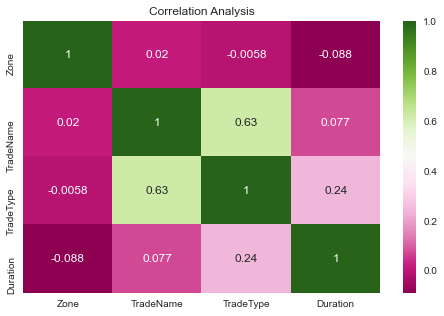

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
plt.style.use("seaborn")
plt.title("Correlation Analysis")
c= df1.corr()
sns.heatmap(c,cmap='PiYG',annot=True)

In [73]:
from sklearn.model_selection import train_test_split
import numpy as np
df.replace([np.inf, -np.inf], np.nan, inplace=True)
X = df.drop(['Zone'],axis=1)
y = df['Zone']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0,shuffle=True)
import category_encoders as c
enc = c.OneHotEncoder(cols=['TradeName','TradeType'])
X_train = enc.fit_transform(X_train)
X_test = enc.transform(X_test)

GuassianNB Accuracy: 0.40228985734032285
Classification Report of Gussian :
              precision    recall  f1-score   support

 Center Zone       0.80      0.10      0.18     25364
  North Zone       0.58      0.26      0.36     28815
  South Zone       0.34      0.92      0.50     22507

    accuracy                           0.40     76686
   macro avg       0.57      0.43      0.35     76686
weighted avg       0.58      0.40      0.34     76686

Confuusion Matrix


<AxesSubplot:>

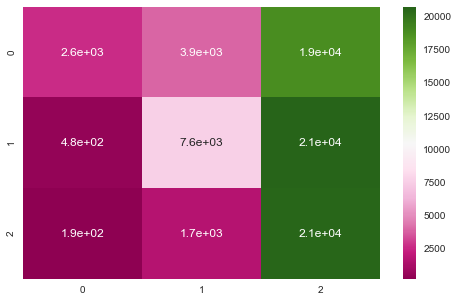

In [76]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn import metrics
NB = GaussianNB().fit(X_train, y_train)
predicted1= NB.predict(X_test)
print("GuassianNB Accuracy:",metrics.accuracy_score(y_test, predicted1))
print("Classification Report of Gussian :")
print(classification_report(y_test, predicted1))
print("Confuusion Matrix")
cmn=metrics.confusion_matrix(y_test, predicted1)
plt.figure(figsize=(8,5))
plt.style.use("seaborn")
sns.heatmap(cmn,cmap='PiYG',annot=True)

RandomForest Accuracy: 0.43696372219179513
Classification Report of RandomForest:
              precision    recall  f1-score   support

 Center Zone       0.66      0.18      0.28     25364
  North Zone       0.40      0.94      0.56     28815
  South Zone       0.72      0.09      0.16     22507

    accuracy                           0.44     76686
   macro avg       0.60      0.40      0.33     76686
weighted avg       0.58      0.44      0.35     76686

Confuusion Matrix


<AxesSubplot:>

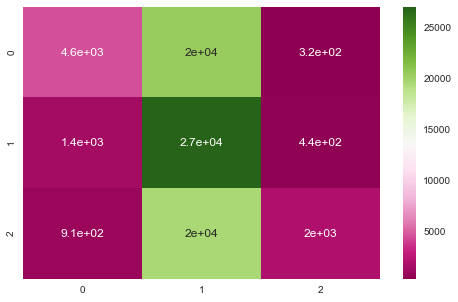

In [77]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)
classifier_rf.fit(X_train, y_train)
predicted2= classifier_rf.predict(X_test)
print("RandomForest Accuracy:",metrics.accuracy_score(y_test, predicted2))
print("Classification Report of RandomForest:")
print(classification_report(y_test, predicted2))
print("Confuusion Matrix")
cm1=metrics.confusion_matrix(y_test, predicted2)
plt.figure(figsize=(8,5))
plt.style.use("seaborn")
sns.heatmap(cm1,cmap='PiYG',annot=True)

DecisionTree Accuracy: 0.4191508228359805
Classification Report of DecisionTree:
              precision    recall  f1-score   support

 Center Zone       0.45      0.32      0.37     25364
  North Zone       0.41      0.82      0.54     28815
  South Zone       0.90      0.02      0.03     22507

    accuracy                           0.42     76686
   macro avg       0.59      0.39      0.32     76686
weighted avg       0.57      0.42      0.34     76686

Confuusion Matrix


<AxesSubplot:>

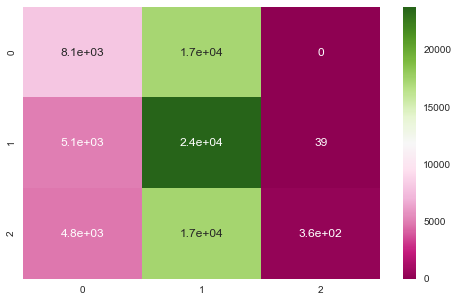

In [78]:
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree.fit(X_train, y_train)
predicted3= decision_tree.predict(X_test)
print("DecisionTree Accuracy:",metrics.accuracy_score(y_test, predicted3))
dtm=metrics.confusion_matrix(y_test, predicted3)
print("Classification Report of DecisionTree:")
print(classification_report(y_test, predicted3))
print("Confuusion Matrix")
cm1=metrics.confusion_matrix(y_test, predicted2)
plt.figure(figsize=(8,5))
plt.style.use("seaborn")
sns.heatmap(dtm,cmap='PiYG',annot=True)

KNeighbors Accuracy: 0.45701953420441804
Classification Report of KNeighbors:
              precision    recall  f1-score   support

 Center Zone       0.47      0.46      0.46     25364
  North Zone       0.52      0.47      0.49     28815
  South Zone       0.39      0.44      0.41     22507

    accuracy                           0.46     76686
   macro avg       0.46      0.46      0.46     76686
weighted avg       0.46      0.46      0.46     76686

Confuusion Matrix


<AxesSubplot:>

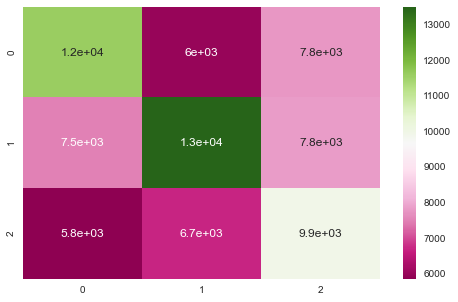

In [79]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
predicted4= classifier.predict(X_test)
print("KNeighbors Accuracy:",metrics.accuracy_score(y_test, predicted4))
kkm=metrics.confusion_matrix(y_test, predicted4)
print("Classification Report of KNeighbors:")
print(classification_report(y_test, predicted4))
print("Confuusion Matrix")
cm1=metrics.confusion_matrix(y_test, predicted2)
plt.figure(figsize=(8,5))
plt.style.use("seaborn")
sns.heatmap(kkm,cmap='PiYG',annot=True)

NB: 0.417073
KNN: 0.459623
RF: 0.522486
DT: 0.522481


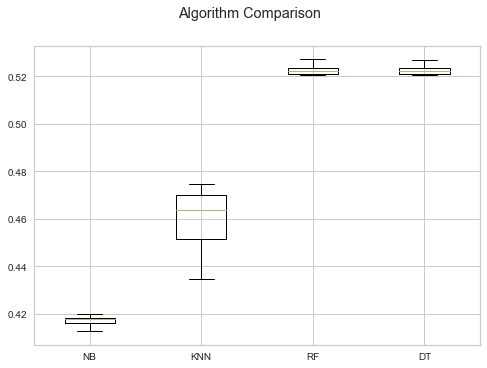

In [55]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
models = []
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('DT', DecisionTreeClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    #kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=10, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f" % (name, cv_results.mean())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()